In [29]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import random
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Feature Scaling

Week 4 | Day 4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand standard scaling and min-max scaling
- Explain why scaling matters
- Implement scaling in sklearn


## What is feature scaling?

- Transforming our data so that they are on similar scales
- i.e., the data have similar ranges of values


## And why?

There are a number of good reasons!

- to handle disparities in units 
- because many machine learning models require scaling (e.g., nearest neighbours, neural networks)
- it can speed up gradient descent (and also increase precision for other  algorithms)



## Role in Gradient Descent

Reminder: gradient descent is an optimization method.  We've seen it used to minimize cost functions

If we have features on a very different scales, it makes it hard to find a good learning rate (step size).  

- If it's too small, it'll take a long time to find the smaller-scale feature (the feature with the larger coefficient).  

- If it's too big, it won't have enough resolution on the larger-scale feature.

## Are there reasons not to re-scale?

Relatively few.

- maybe the scale is relevant
- interpretability
- you need to remember that you did it!

## How do we re-scale?

Two broadly-used methods

- Min / max scaling 
- Standardizing

## Min-Max Scaling

To Min-Max scale our data, we use the formula:
​
$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

> Check: what range of values do our re-scaled data take?

### Let's look at an example with the Boston Housing Dataset

In [30]:
from sklearn import datasets
# Load the Boston Housing dataset
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### First let's manually re-scale the rm variable

In [31]:
# min-max scaling
min_val = df['RM'].min()
max_val = df['RM'].max()

def min_max(x):
    return (x-min_val)/(max_val-min_val)
rm_minmax = df['RM'].apply(min_max)

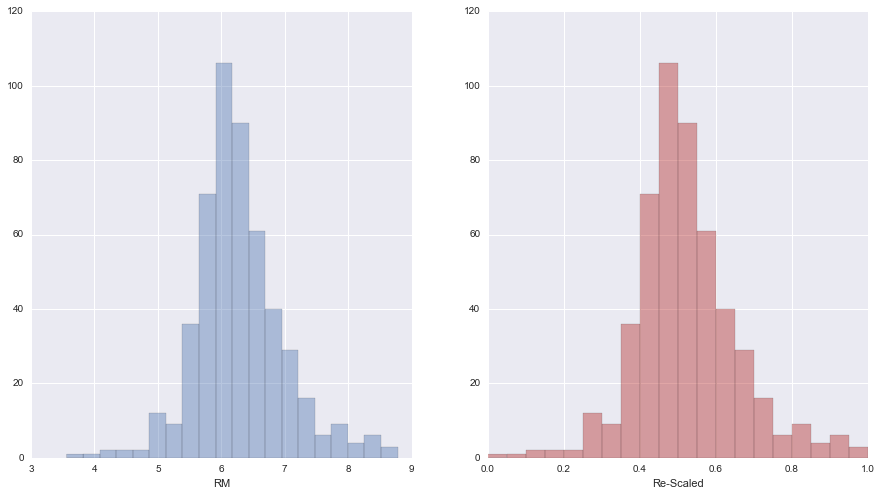

In [32]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.distplot(df['RM'], ax=ax[0], kde=False, bins = 20)
sns.distplot(rm_minmax, ax=ax[1], kde=False, color="firebrick", bins=20)
ax[1].set_xlabel('Re-Scaled');

## Now with sklearn

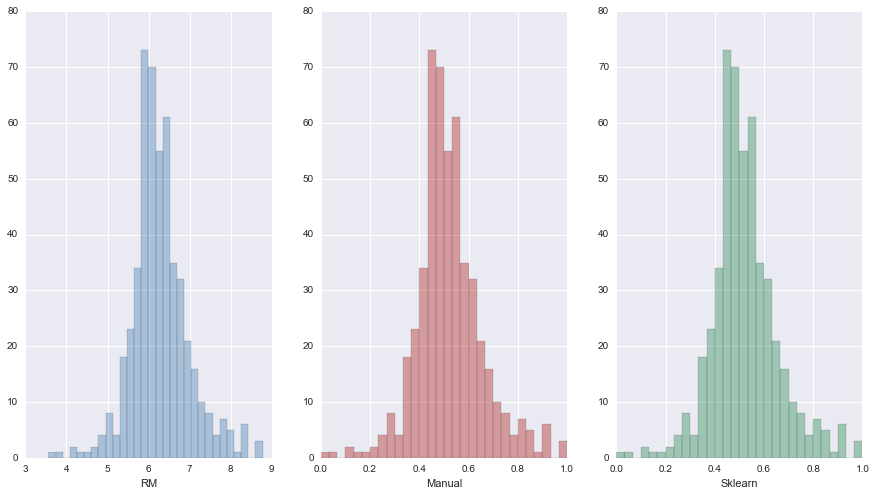

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rm_minmax_sklearn = scaler.fit_transform(df['RM'])
fig, ax = plt.subplots(1,3, figsize=(15,8))
sns.distplot(df['RM'], ax=ax[0], kde=False, color="steelblue", bins=30)
sns.distplot(rm_minmax, ax=ax[1], kde=False, color="firebrick", bins=30)
sns.distplot(rm_minmax_sklearn, ax=ax[2], kde=False, color="seagreen", bins=30)
ax[1].set_xlabel('Manual')
ax[2].set_xlabel('Sklearn');

## Standardizing

To standardize, we transform our data to have mean zero $(\mu = 0)$ and variance 1 $(\sigma^2 = 1)$ by the formula:

$$ x' = \frac{x - \mu}{\sigma}$$

> Check: what range of values do the re-scaled data take?


<img src="./assets/norm_dist_probs.jpg" width="800" />

In [34]:
#manually
mean_val = np.mean(df['RM'])
var_val = np.var(df['RM'])

def standard(x):
    return (x-mean_val)/(var_val**0.5)
rm_standard = df['RM'].apply(standard)

#with sklearn
from sklearn.preprocessing import StandardScaler
standard_scaler =StandardScaler()
rm_standard_sklearn = standard_scaler.fit_transform(df['RM'])

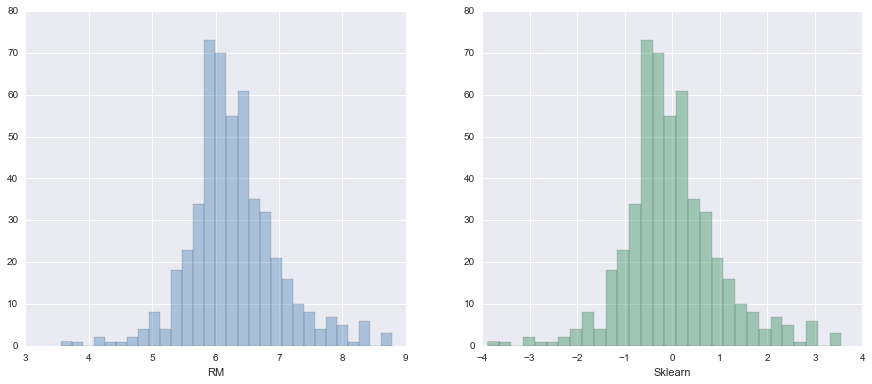

In [35]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df['RM'], ax=ax[0], kde=False, color="steelblue", bins=30)
sns.distplot(rm_standard_sklearn, ax=ax[1], kde=False, color="seagreen", bins=30)
ax[1].set_xlabel('Sklearn');

## When to use which method?

It depends!  Unless the machine learning algorithm requires a certain type of preprocessing, it can be unclear which to use.  

**Very general guidelines**
- Standardize when there is a huge variance in values.
- Standardize when a single feature can have both a positive and negative effect.
- **Consider** normalizing anything that will be used with Euclidean distance.



## A note on outliers...

*Generally* outliers are a bigger problem for min-max scaling than standardising.

Consider a feature where 999 of the data points are between 0 and 100, and there is one outlier at 150.

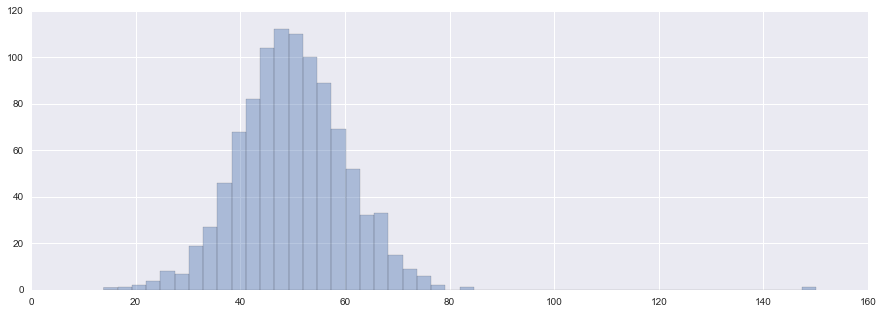

In [36]:
data = list(np.random.normal(50,10,size=999))
data.append(150)
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(data, kde=False);

Let's use both min-max scaling and standardizing...

And then zoom in on the 99.9% of the data that was originally in the 0-100 range

In [37]:
minmax = list(scaler.fit_transform(data))
stand = list(standard_scaler.fit_transform(data))

data.pop()
minmax.pop()
stand.pop()



9.5978635745272456

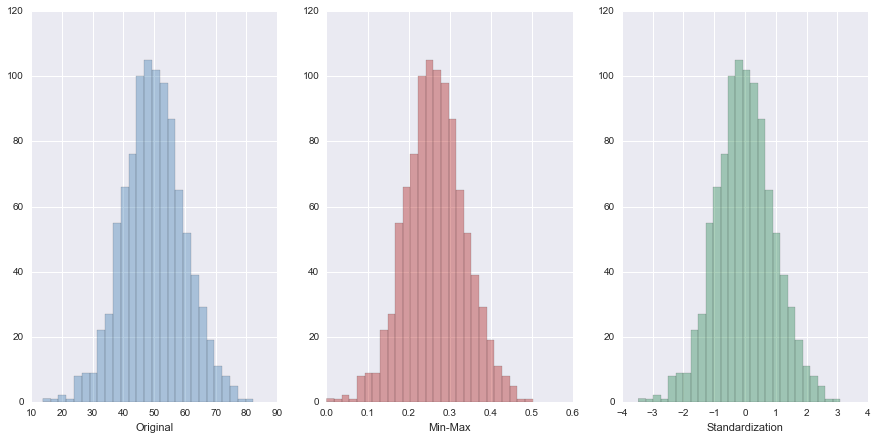

In [38]:
fig, ax = plt.subplots(1,3, figsize=(15,7))
sns.distplot(data, ax=ax[0], kde=False, color='steelblue')
sns.distplot(minmax, ax=ax[1], kde=False, color='firebrick')
sns.distplot(stand, ax=ax[2], kde=False, color='seagreen')
ax[0].set_xlabel('Original')
ax[1].set_xlabel('Min-Max')
ax[2].set_xlabel('Standardization');

## Lab (25 minutes)

- using the Boston Housing set, build a logistic regression and k nearest neighbours classification to predict median home value
- scale the features using both min-max and standardizing
- does it affect model performance?